<a href="https://colab.research.google.com/github/Shubhz-git/Blockchain-Project_NCI/blob/main/Thesis_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files

uploaded = files.upload()

# from google.colab import drive

# drive.mount('/content/drive')

# path='/content/drive/My Drive/Colab Notebooks/'

Saving KDDTrain+.csv to KDDTrain+.csv


In [2]:
import numpy as np 
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder

In [6]:
df_train=pd.read_csv('KDDTrain+.csv', header=0, na_values='?')
df_train = df_train.fillna(df_train.mean())
df_train

<ipython-input-6-85d9b2083787>:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_train = df_train.fillna(df_train.mean())


,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,...,f33,f34,f35,f36,f37,f38,f39,f40,f41,Label
0,tcp,ftp_data,SF,491,0,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,udp,other,SF,146,0,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,tcp,private,S0,0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,dos
3,tcp,http,SF,232,8153,0,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,tcp,http,SF,199,420,0,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,tcp,private,S0,0,0,0,0,0,0,0,...,25,0.10,0.06,0.00,0.00,1.00,1.00,0.00,0.00,dos
125969,udp,private,SF,105,145,0,0,0,0,0,...,244,0.96,0.01,0.01,0.00,0.00,0.00,0.00,0.00,normal
125970,tcp,smtp,SF,2231,384,0,0,0,0,0,...,30,0.12,0.06,0.00,0.00,0.72,0.00,0.01,0.00,normal
125971,tcp,klogin,S0,0,0,0,0,0,0,0,...,8,0.03,0.05,0.00,0.00,1.00,1.00,0.00,0.00,dos


In [36]:
# Renaming column names
columns = (['type_of_protocol' ,'service_type' ,'flag' ,'src_bytes' ,'dst_bytes' ,'land' ,'wrong_fragment' ,'urgent' ,'hot' ,
            'num_failed_logins' ,'logged_in' ,'num_compromised' ,'root_shell' ,'su_attempted' ,'num_root' ,'num_file_creations' ,
            'num_shells' ,'num_access_files' ,'num_outbound_cmds' ,'is_host_login' ,'is_guest_login' ,'count' ,'srv_count' ,'serror_rate' ,
            'srv_serror_rate' ,'rerror_rate' ,'srv_rerror_rate' ,'same_srv_rate' ,'diff_srv_rate' ,'srv_diff_host_rate' ,'dst_host_count' ,
            'dst_host_srv_count' ,'dst_host_same_srv_rate' ,'dst_host_diff_srv_rate' ,'dst_host_serror_rate' ,'dst_host_same_src_port_rate' ,
            'dst_host_srv_diff_host_rate' ,'dst_host_rerror_rate' ,'dst_host_srv_rerror_rate' ,'level' ,'attack-type_or_normal']) 
df_train.columns = columns
df_train.head()


,type_of_protocol,service_type,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_serror_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,level,attack-type_or_normal
0,1,20,9,491,0,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,1
1,2,43,9,146,0,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,1
2,1,48,5,0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,0
3,1,24,9,232,8153,0,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,1
4,1,24,9,199,420,0,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1


In [8]:
ytrn=df_train['attack-type_or_normal']
x=df_train

In [9]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125973 entries, 0 to 125972
Data columns (total 41 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   type_of_protocol             125973 non-null  object 
 1   service_type                 125973 non-null  object 
 2   flag                         125973 non-null  object 
 3   src_bytes                    125973 non-null  int64  
 4   dst_bytes                    125973 non-null  int64  
 5   land                         125973 non-null  int64  
 6   wrong_fragment               125973 non-null  int64  
 7   urgent                       125973 non-null  int64  
 8   hot                          125973 non-null  int64  
 9   num_failed_logins            125973 non-null  int64  
 10  logged_in                    125973 non-null  int64  
 11  num_compromised              125973 non-null  int64  
 12  root_shell                   125973 non-null  int64  
 13 

In [ ]:
df_train.describe()

,type_of_protocol,service_type,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_serror_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,level,attack-type_or_normal
0,tcp,ftp_data,SF,491,0,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,udp,other,SF,146,0,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,tcp,private,S0,0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,dos
3,tcp,http,SF,232,8153,0,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,tcp,http,SF,199,420,0,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


In [10]:
df_train['attack-type_or_normal'].value_counts()

normal    67343
dos       45927
probe     11656
r2l         993
u2r          54
Name: attack-type_or_normal, dtype: int64

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


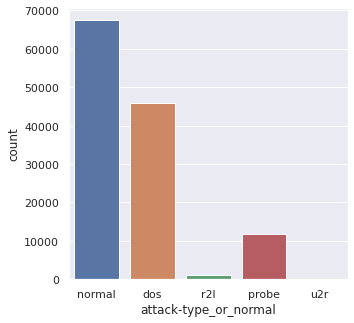

In [12]:
sns.set(rc={'figure.figsize':(5,5)})
sns.countplot(ytrn)
plt.show()   

In [13]:
import plotly.express as px
fig = px.pie(df_train, values=df_train['attack-type_or_normal'].value_counts(), names=df_train['attack-type_or_normal'].unique(), title='attack-type_or_normal',width = 500, height = 500)
fig.show()

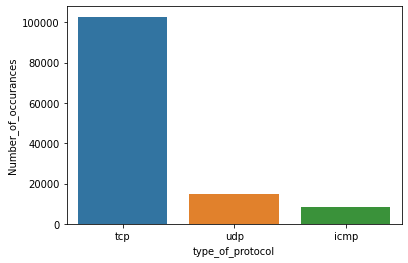

In [11]:
temp = df_train['type_of_protocol'].value_counts()
copy = temp.index
interchange = temp.values
zipped = list(zip(copy, interchange))
display = pd.DataFrame(zipped, columns=['type_of_protocol', 'Number_of_occurances'])
sns.barplot(data=display, x='type_of_protocol', y='Number_of_occurances')

In [14]:
# Pre-processing Dataset
lbEn = LabelEncoder()
x['type_of_protocol']=lbEn.fit_transform(x['type_of_protocol'])
x['service_type']=lbEn.fit_transform(x['service_type'])
x['flag']=lbEn.fit_transform(x['flag'])
x['attack-type_or_normal']=lbEn.fit_transform(x['attack-type_or_normal'])

ytrn=lbEn.fit_transform(ytrn)

In [15]:
# Applying Infinite feature Selection 
import math
from scipy import stats
x=np.asarray(x)
ytrn=np.asarray(ytrn)

alpha=0.85;

def bsxfun(STD ):
  m = np.zeros( (STD.shape[0], STD.shape[0]) )
  for i in range( 0,STD.shape[0] ):
      for j in range( 0,STD.shape[0] ):
          if( STD[i] > STD[j] ):
              m[i,j] = STD[i]
          else:
              m[i,j] = STD[j]
  return m

def DivideByMax(corr_ij):
  m = -1
  for i in range(0,corr_ij.shape[0]): # Find the max.s
      for j in range(0,corr_ij.shape[1]):
          if( corr_ij[i,j] > m ):
              m = corr_ij[i,j]

  for i in range(0,corr_ij.shape[0]): # Divide by the maximum value.
      for j in range(0,corr_ij.shape[1]):
          corr_ij[i,j] = corr_ij[i,j] / m

  return corr_ij

def SubtractMin(corr_ij ):
  m = 10100
  for i in range(0,corr_ij.shape[0]): # Find the min.
      for j in range(0,corr_ij.shape[1]):
          if( corr_ij[i,j] < m ):
              m = corr_ij[i,j]

  for i in range(0,corr_ij.shape[0]): # Subtract the min value.
      for j in range(0,corr_ij.shape[1]):
          corr_ij[i,j] = corr_ij[i,j] - m

  return corr_ij  

corr_ij, pval = stats.spearmanr(x) #measures the strength and direction of association between two ranked variables

for i in range( 0,corr_ij.shape[0] ):
  for j in range( 0,corr_ij.shape[1] ):
    if( math.isnan(corr_ij[i,j]) or corr_ij[i,j] < -1 or corr_ij[i,j] > 1 ):
      corr_ij[i,j] = 0

STD = np.std(x, ddof = 1, axis = 0)

STDMatrix = bsxfun( STD )
STDMatrix = SubtractMin(STDMatrix)
sigma_ij = DivideByMax(STDMatrix)

for i in range( 0,sigma_ij.shape[0] ):
  for j in range( 0,sigma_ij.shape[1] ):
    if( math.isnan(sigma_ij[i,j]) or sigma_ij[i,j] < -1 or sigma_ij[i,j] > 1 ):
      sigma_ij[i,j] = 0

A =  ( alpha*corr_ij + (1-alpha)*sigma_ij );

I = np.identity( A.shape[0] )

r = ( 0.9/ max( np.linalg.eigvals(A) ) )
y = I - ( r * A )
S = np.linalg.inv( y ) - I
WEIGHT = np.sum( S , axis=1 )

RANKED = np.argsort(WEIGHT)
RANKED = np.flip(RANKED,0)

RANKED = RANKED.T
WEIGHT = WEIGHT.T

/usr/local/lib/python3.8/dist-packages/numpy/lib/function_base.py:2691: RuntimeWarning:

invalid value encountered in true_divide

/usr/local/lib/python3.8/dist-packages/numpy/lib/function_base.py:2692: RuntimeWarning:

invalid value encountered in true_divide



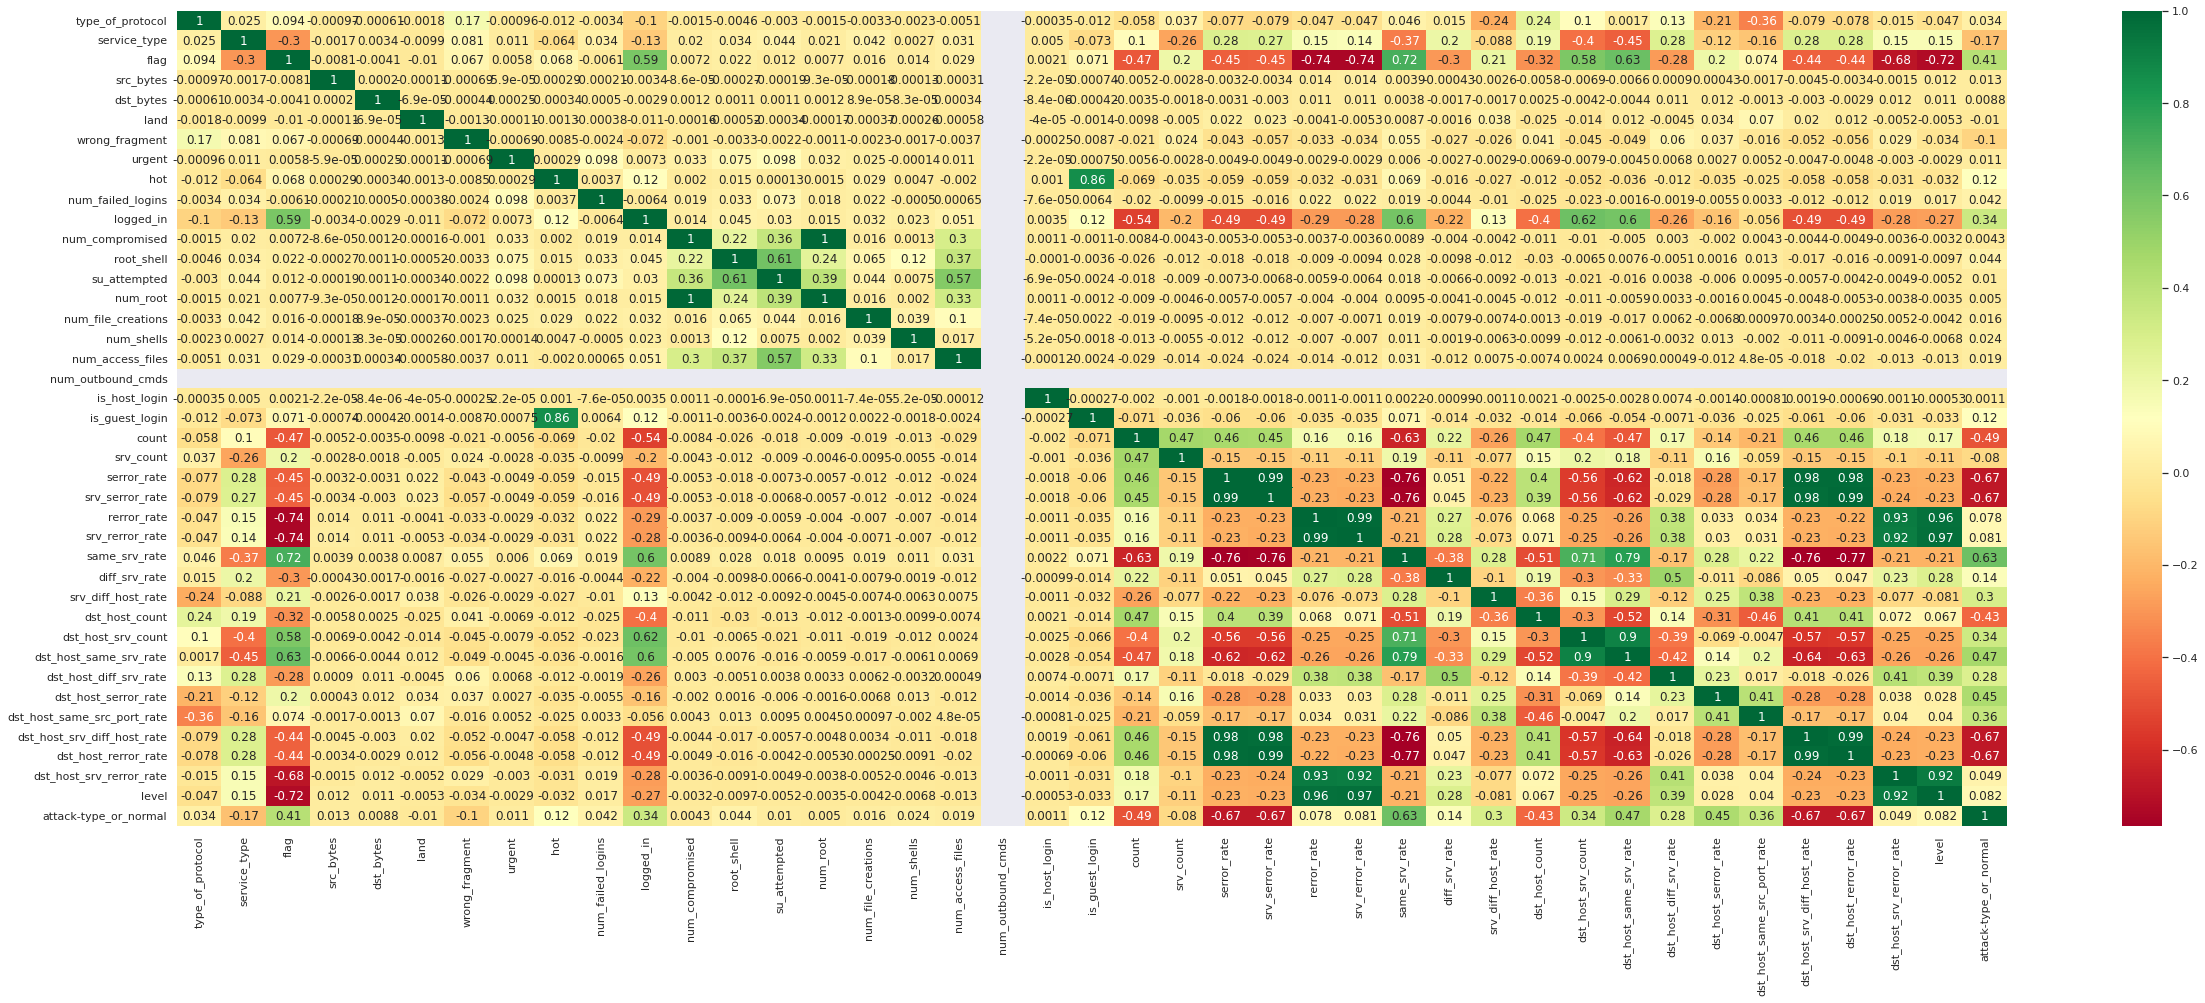

In [30]:
plt.figure(figsize=(41,15))  # on this line I just set the size of figure to 41 by 15.
p=sns.heatmap(df_train.corr(), annot=True,cmap ='RdYlGn')  # seaborn has very simple solution for heatmap

In [31]:
CheckS=WEIGHT>np.mean(WEIGHT)
Index=np.where(CheckS)[0];
bRANKED=RANKED[Index]
Selx=x[:,bRANKED]

In [17]:
# Applying Feature Extraction [ Princple Component Analysis]
pca = PCA(n_components=15)
nSelx = pca.fit_transform(Selx);

# Dividing data into training and testing
X_train,X_test,Y_train,Y_test=train_test_split(nSelx,ytrn,random_state=42,test_size=0.3)

In [18]:
# Applying Data Modelling 
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
model_1 = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
model_2 = XGBClassifier()
model_3 = RandomForestClassifier() 


classifier = VotingClassifier(
    estimators=[('KNN', model_1), ('XGB', model_2), ('RF', model_3)], voting='hard')

classifier.fit(X_train, Y_train)
Output=classifier.predict(X_test)


In [19]:
# Evaluation Parameter
ACC  = metrics.accuracy_score(Y_test, Output)
P  = metrics.precision_score(Y_test, Output,average='weighted')
R  = metrics.recall_score(Y_test, Output,average='weighted')
F  = metrics.f1_score(Y_test, Output,average='weighted')

plotdata = pd.DataFrame({
    "Performance Parameter Comparison":[ACC*100,P*100,R*100,F*100],},
    index=["Accuracy","Precision" ,"Recall","F1-Score"])
print(plotdata)

           Performance Parameter Comparison
Accuracy                          99.325254
Precision                         99.324394
Recall                            99.325254
F1-Score                          99.308309


          Accuracy(%) Comparison
KNN                    75.750000
MLP                    77.410000
RF                     81.590000
XGBoost                95.550000
Proposed               99.325254


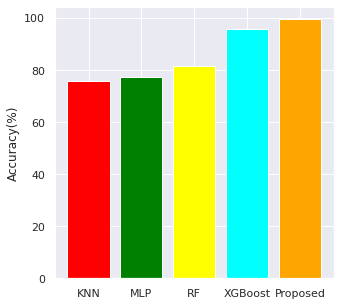

In [20]:
plotdata = pd.DataFrame({
    "Accuracy(%) Comparison":[75.75,77.41,81.59,95.55,ACC*100],},
    index=["KNN","MLP" ,"RF","XGBoost", "Proposed"])
print(plotdata)

Model = ["KNN","MLP" ,"RF","XGBoost", "Proposed"]
MMean = [75.75,77.41,81.59,95.55,ACC*100]
plt.bar(Model, MMean, color=['red', 'green','yellow','cyan','orange'])
plt.ylabel('Accuracy(%)')
plt.show()

          F1-Score(%) Comparison
DT                     94.500000
RF                     94.600000
XGBoost                95.550000
Proposed               99.308309


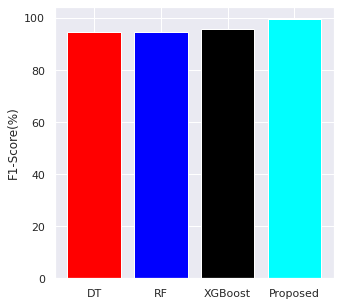

In [21]:
plotdata = pd.DataFrame({
    "F1-Score(%) Comparison":[94.5,94.6,95.55,F*100],},
    index=["DT" ,"RF","XGBoost", "Proposed"])
print(plotdata)

Model = ["DT" ,"RF","XGBoost", "Proposed"]
MMean = [94.5,94.6,95.55,R*100]
plt.bar(Model, MMean, color=['red', 'blue','black','cyan'])
plt.ylabel('F1-Score(%)')
plt.show()

          Precision(%) Comparison
DT                      90.200000
RF                      90.000000
XGBoost                 92.000000
Proposed                99.324394


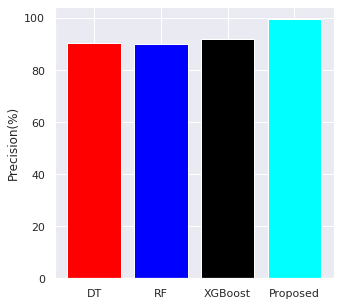

In [22]:
plotdata = pd.DataFrame({
    "Precision(%) Comparison":[90.2,90,92,P*100],},
    index=["DT" ,"RF","XGBoost", "Proposed"])
print(plotdata)

Model = ["DT" ,"RF","XGBoost", "Proposed"]
MMean = [90.2,90,92,P*100]
plt.bar(Model, MMean, color=['red', 'blue','black','cyan'])
plt.ylabel('Precision(%)')
plt.show()

          Recall(%) Comparison
DT                   85.000000
RF                   82.000000
XGBoost              98.000000
Proposed             99.325254


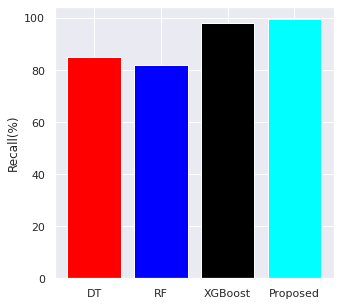

In [23]:
plotdata = pd.DataFrame({
    "Recall(%) Comparison":[85,82,98,R*100],},
    index=["DT" ,"RF","XGBoost", "Proposed"])
print(plotdata)

Model = ["DT" ,"RF","XGBoost", "Proposed"]
MMean = [85,82,98,R*100]
plt.bar(Model, MMean, color=['red', 'blue','black','cyan'])
plt.ylabel('Recall(%)')
plt.show()